In [4]:
import pandas as pd


df = pd.read_csv('CapstoneData.csv')


In [5]:
regional = (
    df.groupby(['REGION_NAME', 'BNF_CHEMICAL_SUBSTANCE'])['ITEMS']
    .sum()
    .reset_index()
    .rename(columns={'ITEMS': 'REGION_ITEMS'})
)

national = (
    df.groupby('BNF_CHEMICAL_SUBSTANCE')['ITEMS']
    .sum()
    .reset_index()
    .rename(columns={'ITEMS': 'NATIONAL_ITEMS'})
)


In [6]:
# Merge national and regional data
merged = pd.merge(regional, national, on='BNF_CHEMICAL_SUBSTANCE')

# Total prescriptions in each region
region_totals = df.groupby('REGION_NAME')['ITEMS'].sum().reset_index().rename(columns={'ITEMS': 'REGION_TOTAL_ITEMS'})
merged = pd.merge(merged, region_totals, on='REGION_NAME')

# Total national prescriptions
national_total = df['ITEMS'].sum()

# Compute shares
merged['REGION_SHARE'] = merged['REGION_ITEMS'] / merged['REGION_TOTAL_ITEMS']
merged['NATIONAL_SHARE'] = merged['NATIONAL_ITEMS'] / national_total

# Relative Prescription Ratio (RPR)
merged['RPR'] = merged['REGION_SHARE'] / merged['NATIONAL_SHARE']


In [7]:
# Filter potential disparities where RPR > 1.5 (50% higher than national average)
disparities = merged[merged['RPR'] > 1.5].sort_values(by='RPR', ascending=False)

# View top disparities
disparities[['REGION_NAME', 'BNF_CHEMICAL_SUBSTANCE', 'RPR']].head(10)


,REGION_NAME,BNF_CHEMICAL_SUBSTANCE,RPR
5558,SOUTH WEST,Rotavirus,10.957807
5557,SOUTH WEST,Powder soya based formula,10.957807
5556,SOUTH WEST,Everolimus,10.957807
5555,SOUTH WEST,Cholesterol/simvastatin,10.957807
5559,SOUTH WEST,Selenium sulfide,10.957807
5511,SOUTH WEST,Evolocumab,9.851490
5502,SOUTH WEST,Alirocumab,9.354226
323,EAST OF ENGLAND,Dimethyl sulfoxide,8.821706
486,EAST OF ENGLAND,Gluten free/low protein pasta,8.821706
1042,EAST OF ENGLAND,Ready to serve 15g protein equivalent (0913226),8.821706


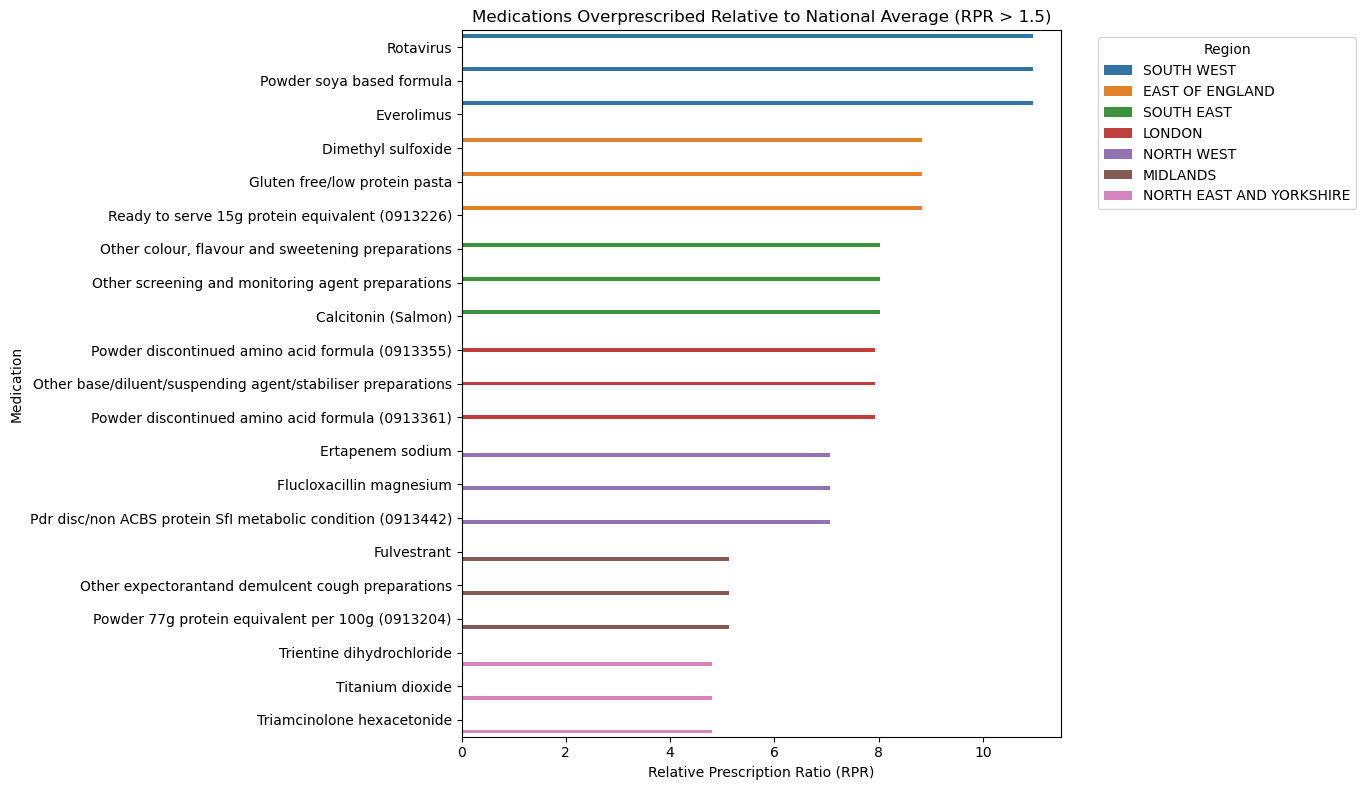

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

top_disparities = disparities.groupby('REGION_NAME').head(3)  # Top 3 per region

plt.figure(figsize=(14, 8))
sns.barplot(
    data=top_disparities,
    x='RPR',
    y='BNF_CHEMICAL_SUBSTANCE',
    hue='REGION_NAME'
)
plt.title('Medications Overprescribed Relative to National Average (RPR > 1.5)')
plt.xlabel('Relative Prescription Ratio (RPR)')
plt.ylabel('Medication')
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
